# 저장

* Last Updated: 20171105 20170410 20161006

## S.1 학습내용

### S.1.1 목표

* 인코딩을 이해하고, 한글을 유니코드로 파일에 저장하고, 읽을 수 있다.
* 데이터를 json, csv 파일로 쓰고, 읽을 수 있다.
* 데이터를 웹데이터 (url에서 읽은 데이터)를 읽어서 리스트 자료로 저장하여 연산을 할 수 있다.
* 데이터를 NoSql로 저장하고, 사용할 수 있다.

### S.1.2 목차

* S.2 웹 데이터 저장
* S.2.1 부호화
* S.2.2 웹에서의 다국적 언어
* S.2.2 운영체제의 인코딩
* S.2.3 프로그래밍의 인코딩
* S.2.4.1 인코딩 알아보기
* S.2.4.2 인코딩 설정하기
* S.2.4.3 인코딩 실습
* S.3 파일
* S.3.1 Python의 파일
* S.3.2 JSON 파일
* S.3.3 csv 파일
* S.4 MongoDB
* S.4.1 설치
* S.4.2 MongoDB shell
* S.4.3 pymongo
* S.5 CouchDB
* S.5.1 설치
* S.5.2 cURL
* S.5.3 데이터베이스
* S.5.4 View
* S.5.5 Shows
* S.5.6 Replication

### S.1.3 문제

* 문제 S-1: 음악 검색결과를 파일저장
* 문제 S-2: 사용자 ID, 이름을 JSON형식으로 파일에 쓰기
* 문제 S-3: JSON 파일을 읽기
* 문제 S-4: url에서 JSON을 읽기
* 문제 S-5: url에서 파일을 가져와 자료구조에 저장하기
* 문제 S-6: MongoDB에 'id', '이름'을 저장하고, 조회하는 프로그램을 실행하기
* 문제 S-7: Python으로 MongoDB Persons 조회하기
* 문제 S-8: 음악 검색결과를 MongoDB 저장
* 문제 S-9: CouchDB로 html 페이지 저장하기

### S.1.4 연습

* 웹크롤링 데이터를 MongoDB로 저장한다.

* 한글 https://wiki.python.org/moin/PrintFails

## S.2 웹 데이터 저장

웹에서 수집한 데이터는 수집하는 대로, 이른바 streaming하면서 분석할 수 있다.
그러나 기계학습을 적용하려면 일정 분량의 저장된 훈련데이터가 필요하게 된다.
웹에서 수집한 텍스트, 사진, 음성과 같은 데이터를 컴퓨터는 어떻게 저장하고 표현하는지 알아보자.

### S.2.1 부호화

데이터는 우리 눈에 보이는 대로 저장되지 않는다.
이진수는 컴퓨터 언어이다. 이진수로 쓰고, 읽고, 전달하고 처리한다. 컴퓨터는 무엇이든 이진수로 저장한다.
텍스트 또는 그림, 음악 등을 code points로 변환하는 것을 부호화, encoding이라고 한다.
우리가 많이 생산하는 텍스트에 대해 알아 보자.
텍스트는 문자로 구성되어 있고, 문자는 대응하는 '코드'를 가지고 있다.
사람에게는 문자이지만 컴퓨터는 '코드'이다.
'A'는 사람이 사용하는 문자이고, 컴퓨터에게는 코드 또는 부호 '65'이다 (편의상 10진수를 사용한다).

용어 | 설명 | 예
-----|-----|-----
문자 | 텍스트의 가장 작은 단위, Character | 'A' 'B'
부호 | 문자를 표현하는 코드 값 Code points. | 1 바이트는 0~255, unicode는 최대 4 바이트
인코딩 | 문자를 코드 값 Code points로 변환. 디코딩은 사람이 인식할 수 있는 문자로 변환 | 'a' = 97 (ASCII 코드 값)

많이 사용하고 있는 인코딩 방식은 ASCII, Unicode가 있다.

인코딩 방식 | 설명
----------|----------
ASCII | 1 바이트 가운데 7비트, $2^7$, 128 문자를 표현할 수 있다. Extended ASCII는 확장해서 8비트, 256 문자를 부호값으로 표현한다.
Unicode | 최대 4바이트로 문자를 표현하는 code points. UTF-8, UTF-16, UTF-32가 많이 쓰인다. 뒤 숫자는 비트를 의미.

> UTF-8

> 가장 많이 사용하는 Unicode 인코딩 방식이다.
> HTML, XML은 utf-8을 기본 설정으로 사용한다.위키피디아에 따르면, 2017년 기준 웹의 약 90%가 utf-8을 사용한다.
> 가변 길이로 4 바이트까지 사용한다. 처음 1~128은 ASCII와 동일하게 구성한다.


### S.2.2 웹에서의 다국적 언어

* 여러 언어가 쓰인 웹페이지를 읽어서 화면에 올바르게 출력되는지 살펴본다.
* 유니코드가 지원되면 깨지지 않고 올바르게 나타날 수 있다.
* 간편하게 curl을 사용하거나, 웹에서 페이지를 열어보자.

```
http://httpbin.org/encoding/utf8
```

Python 라이브러리 'requests'를 사용해서 출력하면 어떤지 살펴 보자.
가져온 웹페이지에서 앞 500문자를 읽었다.
암호같은 기호가 많이 눈에 띄인다.
이런 기호 앞 'u'는 unicode라는 뜻이고, 그 4자리 부호가 뒤따르고 있다.

In [1]:
import requests
r = requests.get("http://httpbin.org/encoding/utf8")
r.text[0:500]

u'<h1>Unicode Demo</h1>\n\n<p>Taken from <a\nhref="http://www.cl.cam.ac.uk/~mgk25/ucs/examples/UTF-8-demo.txt">http://www.cl.cam.ac.uk/~mgk25/ucs/examples/UTF-8-demo.txt</a></p>\n\n<pre>\n\nUTF-8 encoded sample plain-text file\n\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\u203e\n\nMarkus Kuhn [\u02c8ma\u02b3k\u028as ku\u02d0n] <http://www.cl.cam.ac.uk/~mgk25/> \u2014 2002-07-25\n\n\nThe ASCII compatible UTF-8 encoding used in this plain-text file\nis defined in Unicode, ISO 10646-1, and RFC 2279.\n\n\nUsing Unicode/UTF-8, you can write in emails and so'

Unicode가 섞여 있는 부분, 대략 200 ~ 300 정도의 문자열만 출력해 보자.
Python print문은 Unicode를 올바르게 출력한다.
Python 화면출력이 유니코드를 올바르게 출력하도록 설정되어 있기 때문이다.

In [2]:
print r.text[200:300]

e plain-text file
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Markus Kuhn [ˈmaʳkʊs kuːn] <http://www.cl.ca


위 문자를 화면에 출력할 때 오류가 발생할 수 있다. 이런 'UnicodeEncodeError' 오류는 유니코드를 화면에 출력할 수 없기 때문에 발생한다. 'sys.stdout.encoding'를 확인하자.

In [23]:
import sys
print sys.stdout.encoding   # locale LC_CTYPE

UTF-8


### S.2.3 운영체제의 인코딩

인코딩은 운영체제에서 지원하는 형식을 가져와서 Python과 같은 프로그래밍 언어에서 사용하게 된다.
운영체제에서 지원하는 인코딩 방식을 알아 보자.
결론부터 말하면, 가능하면 unicode를 사용하도록 한다.
윈도우 운영체제는 unicode를 기본으로 지원하지 않을 수 있다.
locale을 'utf-8'로 정의하도록 한다.

> 한글 부호표준
> 한글을 사용하면서 EUC-KR 또는 CP949 부호를 만나게 된다.
> EUC-KR, CP949는 2바이트로 한글을 표현하는 표준이다.
> 윈도우는 CP949를 기본으로 사용한다. 인터넷에서 CP949를 유니코드로 인식해서 처리하면 오류가 발생할 수 있다.
> 지금은 유니코드가 주로 사용된다.

운영체제 locale을 알아본다. UTF-8이 아닌 경우 유니코드를 출력할 수 없으므로 설정을 변경하도록 한다.

In [4]:
import locale
locale.getdefaultlocale()

('en_US', 'UTF-8')

* 운영체제 locale의 설정을 확인한다.
* 윈도우에서는 '제어판 > 언어' 또는 명령창에서 'systeminfo.exe'를 사용하면 '시스템 로캘', '입력 로캘'을 보여준다.
* 문자, 통화, 시간, 숫자, 언어에 대해 주요 환경변수 설정이다. LC_ALL은 비워져 설정이 되어 있지 않다.

구분 | 설명
-----|-----
LC_ALL | 모든 locale 변수의 값보다 우선한다. 기본 값은 비워 놓는다.
LC_CTYPE | 문자 분류와 대소문자 변환을 정의
LC_MONETARY | 통화 숫자 정보의 형식을 정의
LC_NUMERIC | 숫자, 비-통화 형식을 정의
LC_TIME | 날짜 및 시간 형식을 정의
LANG | LC_ALL이 설정되지 않은 경우, LANG 값은 언어, 문자 세트, 정렬 순서를 판별

In [86]:
!locale

LANG=en_US.UTF-8
LANGUAGE=en_US:en
LC_CTYPE="en_US.UTF-8"
LC_NUMERIC=ko_KR.UTF-8
LC_TIME=ko_KR.UTF-8
LC_COLLATE="en_US.UTF-8"
LC_MONETARY=ko_KR.UTF-8
LC_MESSAGES="en_US.UTF-8"
LC_PAPER=ko_KR.UTF-8
LC_NAME=ko_KR.UTF-8
LC_ADDRESS=ko_KR.UTF-8
LC_TELEPHONE=ko_KR.UTF-8
LC_MEASUREMENT=ko_KR.UTF-8
LC_IDENTIFICATION=ko_KR.UTF-8
LC_ALL=


### S.2.4 프로그래밍의 인코딩

#### S.2.4.1 인코딩 알아보기

* 운영체제에서 지원하는 인코딩을 가져와서 사용한다.
* Python print문은 운영체제에서 설정된, locale.getpreferredencoding()을 사용한다.
    * locale은 utf-8을 사용하므로, 출력하면 unicode를 이해하고 출력한다.

* Python 인코딩 방식은 sys.getdefaultencoding() 명령문으로 알아볼 수 있다.
* Python 2.x는 'ascii'를 기본으로 사용하고 있다. 의 결과가 'ascii'이다.
* Python 3은 utf-8을 기본 설정으로 사용한다 (when LC_CTYPE is unicode-aware)

In [24]:
import sys, locale
print locale.getpreferredencoding()
print sys.getdefaultencoding()

UTF-8
ascii


* Python os.environ의 LANG이 설정되어 있다.
* 이 값은 운영체제 locale.LANG과 동일한 값을 가지고 있다.

In [9]:
import os
os.environ['LANG']

'en_US.UTF-8'

#### S.2.4.2 인코딩  설정하기

* Python의 기본 encoding을 변경할 수 있다.
* 환경변수를 정해 놓을 수 있다.
```
export PYTHONIOENCODING=utf-8
```

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf-8')

In [ ]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

#### S.2.4.3 인코딩 실습

예를 들어 보자. 문자열 'AB한글'은 영어 2글자, 한글 2글자 이다.
영어 'AB'는 ASCII 문자이다. 반면에 '한글'은 ASCII 문자가 아니다.
ASCII 문자는 0~127 부호 값을 가진다.
반면 128 이상, 즉 '한글'은 ASCII 부호 값이 없다.

한글이 포함되어도 문자 타잎은 'str'이다.
그러나 한글이 포함된 경우 오류가 발생할 수 있으므로 'unicode'를 사용하도록 한다.

데이터 타잎 | 설명 | 예
-----|-----|-----
str | ASCII, 1~128 범위를 가진다. \x로 시작 2자리 (1바이트) | '한' '\xed\x95\x9c'
unicode | 유니코드, 최대 4 바이트, \u로 시작 4자리 | '한' u'\ud55c'

In [88]:
str('한')

'\xed\x95\x9c'

In [28]:
unicode(u'한')

u'\ud55c'

* 한글은 Non-ASCII이다. ASCII에서 unicode로 encoding할 수 없다. 
* '한'은 ASCII 코드 값 Code points가 없기 때문에 오류가 발생한다.

In [91]:
'한'.encode('utf-8')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xed in position 0: ordinal not in range(128)

In [5]:
(u'한').encode('utf-8')

'\xed\x95\x9c'

In [4]:
(u'한').encode('cp949')

'\xc7\xd1'

* stdout encoding 'utf-8'에 따라 출력한다.

In [92]:
print u'한'

한


영어문자는 각 1바이트, 한글은 각 3바이트를 사용한다. 따라서 8바이트가 된다. ASCII는 코드 값 127까지 가진다. 128이상은 설정된 인코딩 방식, 보통 utf-8을 사용하여 변환한다.

format()은 형식을 정해서 출력하는 기능이다. 인자는 {}, 괄호 내에 순서, 콜론으로 변환형식을 정의할 수 있다. 다음은 2진수, 16진수, 10진수로 출력하고 있다.

In [5]:
myStr='AB한글'
print type(myStr)

<type 'str'>


In [10]:
print "length in bytes: ", len(myStr)
for e in myStr:
    print "{0:8b} {0:x} {0:d}".format(ord(e))

length in bytes:  8
 1000001 41 65
 1000010 42 66
11101101 ed 237
10010101 95 149
10011100 9c 156
11101010 ea 234
10111000 b8 184
10000000 80 128


In [7]:
myUnicode=u'AB한글'
print type(myUnicode)

<type 'unicode'>


In [11]:
print "length in bytes: ", len(myUnicode)
for e in myUnicode:
    print "{0:8b} {0:x} {0:d}".format(ord(e))

length in bytes:  4
 1000001 41 65
 1000010 42 66
1101010101011100 d55c 54620
1010111000000000 ae00 44544


utf-8와 cp949로 출력해 본다.

In [8]:
for cp in ['utf-8', 'cp949']:
    print myUnicode.encode(cp)

AB한글
AB�ѱ�


## S.3 파일

### S.3.1 Python 파일

* 'File' 객체를 사용한다 (C언어의 stdio에서 제공하는 file 참조)
* IOError 예외가 발생할 수 있다.
* 'File' 객체는 iterator, factory 패턴을 구현하고 있다.
* next()함수는 iterator이다.
* 생성자 file()을 직접 사용하여 생성할 수 있으나, 'factory' 함수를 사용하는 것을 권고한다.

함수 | 설명 | 반환 returns
-----|-----|-----
open() | built-in' 함수이다. 파일명과 선택적으로 mode, buffering을 정할 수 있다. | File 객체
io.open() | stream을 처리하는 'io' 라이브러리 함수이다. 추가적인 인자로 encoding, newline을 설정할 수 있다. | File 객체

In [1]:
import iplantuml

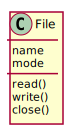

In [2]:
%%plantuml
@startuml
class File {
    name
    mode
    encoding
    closed
    file()
    read()
    write()
    flush()
    next()
    close()
}
@enduml

* mode

mode | 설명
-----|-----
r | 읽기 (default)
w | 쓰기
a | 뒤에 붙이기
b | 바이너리 bytes
t | 텍스트 (default)
+ | 수정

## 문제 S-1: 음악 검색결과를 파일저장

앞 장에서 스크레이핑을 하고 그 결과를 화면에 출력하였다.
여기서는 그 결과를 파일에 저장한다.
다음에는 저장한 결과를 분석하게 된다.

프로그램에 한글이 섞여 있으므로, '# encoding:utf-8'
format()함수를 사용하여 한글문자열을 구성할 때 unicode로 해준다.
파일에 출력할 때도 encoding을 'utf-8'로 맞추어 준다.
간편하게 'codes'를 사용하여 파일에 저장할 수도 있다.

검색결과에 컴마 및 공백이 다수 포함되어 있다.
csv는 올바른 출력형식이 아니다. tab으로 분리하기로 한다. 또한 줄바꿈을 넣었다.

In [18]:
%%writefile src/ds5_1_naverMusicSave.py
#!
# encoding:utf-8
import requests
from bs4 import BeautifulSoup

pageNo=1
p = {"query": u"비오는","target":"track", "page":pageNo}
naverUrl="http://music.naver.com/search/search.nhn?"

def saveMusicBS():
    try:
        fout=open('ds5_1_naverMusicSave.txt','w')
        for pageNo in range(2):
            p = {"query": u"비오는","target":"track", "page":pageNo}
            r = requests.get(naverUrl,params=p)
            soup=BeautifulSoup(r.text,"lxml")
            _selName = [title.get_text().strip() for title in soup.select('._tracklist_move > .name > a.title')]
            _selArtist = [artist.get_text().strip() for artist in soup.select('._artist.artist')]
            _selAlbum= [album.get_text().strip() for album in soup.select('.album > a')]
            print "total number of items:",len(_selName)
            for i in range(len(_selName)):
                row=u"{0}\t{1}\t{2}\t{3}\n".format(pageNo,_selArtist[i],_selName[i],_selAlbum[i])
                fout.write(row.encode('utf-8'))
        fout.close()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)

def main():
    saveMusicBS()

if __name__=="__main__":
    main()



Overwriting src/ds5_1_naverMusicSave.py


### S.3.2 JSON 파일

* JSON은 데이터를 저장하는 형식이다.
* JSON은 schema free, 저장할 데이터 구조를 정하지 않아도 된다. 참고로 XML은 XSD를 사용해 구조를 미리 정할 수 있다.
* JSON은 자바스크립트에서 사용하는 형식이다 (JavaScript Object Notation).
* Javascript뿐만 아니라, 다른 프로그래밍 언어도 JSON을 많이 사용한다.

* JSON 형식
    * 형식은 key와 value의 쌍으로 이루어져 있다.
    * 콜론으로 구분하여 key, value를 구성한다.
    * id='405'의 JSON 예:
```
"id": "405"
```


* JSON 객체
    * JSON 객체로 key, value를 저장할 수 있다.
    * key가 ASCII문자이면 'str', non-ASCII 문자가 포함되면 'unicode'로 변환된다.
    * JSON은 Python dict와 서로 호환된다.
    * id:405 및 name:js인 JSON 객체의 예:
```
{ "id": "405", "name": "js" }
```


* key의 데이터타잎을 확인한다. key가 한글일 경우, 즉 Non-ASCII문자를 포함하고 있으면 'unicode'를 출력한다.
* '\x'는 16진수, '\u'는 unicode이다.
* ord()는 ordinal integer, hex()는 16진수를 출력하는 함수이다.

In [124]:
import json

user1={ "id": "405", "name": "js" }
user2={ "id": "405", "이름": "js" }
user3={ "id": "405", u"이름": "js" }

print user1
print user2
print user3

{'id': '405', 'name': 'js'}
{'id': '405', '\xec\x9d\xb4\xeb\xa6\x84': 'js'}
{u'\uc774\ub984': 'js', 'id': '405'}


In [10]:
print '\xec\x9d\xb4'
print ord('\xec')
print hex(ord('\xec'))

이
236
0xec


In [122]:
print type(user1)

<type 'dict'>


* JSON Array
    * value가 배열을 가질 수 있다. 이 경우 배열은 Python list로 구성한다.
```
[ { ... } ]
```

    * key는 'Persons', value는 배열로 구성한 예:
```
{"Persons":[
    {"id":"405", "name":"js1"},
    {"id":"406", "name":"js2"},
]}
```

In [1]:
import json

p={"Persons":[
    {"id":"405", "name":"js1"},
    {"id":"406", "name":"js2"},
]}

print p

{'Persons': [{'id': '405', 'name': 'js1'}, {'id': '406', 'name': 'js2'}]}


* JSON 파일 함수
    * 함수의 맨끝 's'를 string으로 생각하면 편리하다.

함수 | 설명
-----|-----
loads() | JSON을 문자열에서 읽기
dumps() | JSON을 문자열로 쓰기
load() | JSON을 파일에서 읽기
dump() | JSON을 파일에 쓰기


## 문제 S-2: 사용자 ID, 이름을 JSON형식으로 파일에 쓰기

* 파일 확장자 .json
* 문자열로 변환할 경우, dumps()를 사용한다.


In [2]:
import json

p={"Persons":[
    {"id":"405", "이름":"js1"},
    {"id":"406", "이름":"js2"},
]}

print json.dumps(p)

{"Persons": [{"id": "405", "\uc774\ub984": "js1"}, {"id": "406", "\uc774\ub984": "js2"}]}


* key가 한글이면 Non-ASCII이므로 unicode로 변환된다.

In [3]:
import io, json
with io.open('data/ds_save_persons.json', 'w', encoding='utf8') as json_file:
    data=json.dumps(p, json_file, ensure_ascii=False, encoding='utf8')
    json_file.write(data)

* 방금 dumps()를 사용해서 문자열을 파일로 보냈다. 이번에는 문자열로 만들지 않고 dump()를 사용해서 바로 파일로 써보자.
    * 동일한 명령문으로 실행하면 오류가 발생한다.
    
>    * 버그: Python 2.x 문제가 있다. TypeError가 발생한다 ('unicode'대신 'str'을 사용해야 한다는 오류)
>    * io.open() 대신 open()을 사용하면 오류를 피할 수 있다. Python 3으로 전환되면서 문제가 있는 듯하다.
>        * Python 2.6에서 'unicode'처리를 위해 'io' 모듈을 추가해서 codes.open()를 대체했다.
>        * Python 3.x에서는 io.open()을 사용하는 것을 권고하고 있다.


In [26]:
import os, io, json
with io.open(os.path.join('data','ds_save_persons.json'), 'w') as json_file:
    json.dump(p, json_file, encoding="utf-8")


TypeError: write() argument 1 must be unicode, not str

* with 명령어는 설정을 정의하는 명령어 이다.
* with 명령어로 생성된 파일은 close()를 호출해서 닫지 않아도 된다.

In [8]:
import json, os
with open(os.path.join('data','ds_save_persons.json'), 'w') as json_file:
    json.dump(p, json_file)

In [9]:
!cat data/ds_save_persons.json

{"Persons": [{"id": "405", "\uc774\ub984": "js1"}, {"id": "406", "\uc774\ub984": "js2"}]}

In [6]:
import os, json
json_file=open(os.path.join('data','ds_save_persons.json'), 'w')
json.dump(p, json_file)
json_file.close()

In [7]:
!cat data/ds_save_persons.json

{"Persons": [{"id": "405", "\uc774\ub984": "js1"}, {"id": "406", "\uc774\ub984": "js2"}]}

## 문제 S-3: JSON 파일을 읽기

* file에서 JSON 문자열을 읽어오는 경우

* loads()함수로 json을 읽는다.
    * Persons json을 파일에서 읽는다.
    * json.loads()는 문자열을 반환한다 ('str' 또는 'unicode').
    * 한 번 더 json.loads()를 하면, unicode -> dictionary로 변환한다.


In [1]:
import os, json
fp=open(os.path.join('data','ds_save_persons.json'),'r')
data=fp.read()

In [11]:
print data

{"Persons": [{"id": "405", "\uc774\ub984": "js1"}, {"id": "406", "\uc774\ub984": "js2"}]}


In [3]:
type(data)

str

In [4]:
pjson=json.loads(data)
print pjson

{u'Persons': [{u'\uc774\ub984': u'js1', u'id': u'405'}, {u'\uc774\ub984': u'js2', u'id': u'406'}]}


In [14]:
type(pjson)

dict

In [15]:
for p in pjson['Persons']:
    print p['id'], p[u'이름']

405 js1
406 js2


* 방금 사용했던 loads()를 사용했다. 즉 파일에서 읽은 문자열을 json으로 변환하는 과정을 거쳤다.
* load()를 직접 사용하여 파일에서 dict를 받아와 보자.

In [34]:
import json
import os
with open(os.path.join('data','ds_save_persons.json')) as json_data:
    d = json.load(json_data)
    print type(d), d


<type 'dict'> {u'Persons': [{u'\uc774\ub984': u'js1', u'id': u'405'}, {u'\uc774\ub984': u'js2', u'id': u'406'}]}


* key, value에 u는 유니코드를 의미한다.

In [38]:
for p in d['Persons']:
    print p['id'], p[u'이름']

405 js1
406 js2


In [39]:
import json, ast
r = {u'name': u'A', u'primary_key': 1}
ast.literal_eval(json.dumps(r))

{'name': 'A', 'primary_key': 1}

* JSON을 url에서 읽을 경우

함수 | 설명
-----|-----
json.load(response) | file 객체와 같은 'response'를 사용해서 읽는 load() 함수
json.loads(response.read()) | response.read()에서 반환한 문자열을 읽는 loads() 함수


## 문제 S-4: url에서 JSON을 읽기

* url에 데이터가 저장되어 있는 구조를 먼저 확인해야 한다.
    * 사례1: list > 그 안에는 dictionary로 저장
    * 사례2: dict > meta, data > data 안에는 key없이 값만 list로 저장 (key는 meta에 저장)
* requests 라이브러리는 response를 json으로 읽는 기능을 제공한다.

```
import requests
r = requests.get(url)
r.json()
```

* 사례1: 월드컵 참가 선수 데이터
    * JSON 배열

```
[
  {
    "Competition": "World Cup",
    "Year": 1930,
    "Team": "Argentina",
    "Number": "",
    "Position": "GK",
    "FullName": "Ãngel Bossio",
    "Club": "Club AtlÃ©tico Talleres de Remedios de Escalada",
    "ClubCountry": "Argentina",
    "DateOfBirth": "1905-5-5",
    "IsCaptain": false
  },
  ...
]
```

In [1]:
import requests
_url="https://raw.githubusercontent.com/jokecamp/FootballData/master/World%20Cups/all-world-cup-players.json"
r=requests.get(_url)

In [2]:
if r.status_code==200:
    _json=r.json()

In [3]:
type(_json)

list

In [3]:
print _json[0].keys()

[u'Club', u'ClubCountry', u'Year', u'Number', u'Competition', u'DateOfBirth', u'Team', u'Position', u'FullName', u'IsCaptain']


In [4]:
print _json[0]

{u'Club': u'Club Atl\xc3\xa9tico Talleres de Remedios de Escalada', u'ClubCountry': u'Argentina', u'Year': 1930, u'Number': u'', u'Competition': u'World Cup', u'DateOfBirth': u'1905-5-5', u'Team': u'Argentina', u'Position': u'GK', u'FullName': u'\xc3ngel Bossio', u'IsCaptain': False}


* for 문을 사용하여 json을 읽어 보자.

In [6]:
for i,j in enumerate(_json):
    if(i<10):
        print i,j['FullName'],j['Club']

 0 Ãngel Bossio Club AtlÃ©tico Talleres de Remedios de Escalada
1 Juan Botasso Quilmes AtlÃ©tico Club
2 Roberto Cherro Boca Junio
3 Alberto Chividini Central Norte TucumÃ
4  Club Atletico Estudiantil PorteÃ±o
5  Racing Club de Avellaneda
6 Juan Evaristo Sportivo Barrac
7 Mario Evaristo Boca Junio
8 Manuel Ferreira Estudiantes de La Pla
9 Luis Monti Club AtlÃ©tico San Lorenzo de Almagro


format()을 사용하여 출력형식을 정의할 수 있다.
{}안에 순서, 출력자리수를 정의한다.
2d는 숫자 2자리, 20s는 문자 20자리를 의미한다.

In [15]:
for i,j in enumerate(_json):
    if(i<15):
        print u"{0:2d} name:{1:20s} club:{2}".format(i,j['FullName'],j['Club'])

 0 name:Ãngel Bossio         club:Club AtlÃ©tico Talleres de Remedios de Escalada
 1 name:Juan Botasso         club:Quilmes AtlÃ©tico Club
 2 name:Roberto Cherro       club:Boca Junio
 3 name:Alberto Chividini    club:Central Norte TucumÃ
 4 name:                     club:Club Atletico Estudiantil PorteÃ±o
 5 name:                     club:Racing Club de Avellaneda
 6 name:Juan Evaristo        club:Sportivo Barrac
 7 name:Mario Evaristo       club:Boca Junio
 8 name:Manuel Ferreira      club:Estudiantes de La Pla
 9 name:Luis Monti           club:Club AtlÃ©tico San Lorenzo de Almagro
10 name:                     club:Boca Junio
11 name:Rodolfo Orlandini    club:Club Atletico Estudiantil PorteÃ±o
12 name:Fernando Paternoster club:Racing Club de Avellaneda
13 name:Natalio Perinetti    club:Racing Club de Avellaneda
14 name:Carlos Peucelle      club:Club Sportivo Buenos Aires


* 사례2
    * New York State Baby Names, https://www.healthdata.gov/dataset/baby-names-beginning-2007

In [6]:
import requests
_url="https://health.data.ny.gov/api/views/jxy9-yhdk/rows.json?accessType=DOWNLOAD"
r=requests.get(_url)

In [7]:
_json=r.json()

* json데이터는 meta, data로 구분해서 만들어져 있슴
* data는 52252건

In [14]:
type(_json)

dict

In [16]:
_json.keys()

[u'meta', u'data']

In [17]:
_jsonList=_json['data']

In [18]:
len(_jsonList)

52252

In [19]:
print _json['data'][0]

[1, u'5DC7F285-052B-4739-8DC3-62827014A4CD', 1, 1425450997, u'714909', 1425450997, u'714909', u'{\n}', u'2013', u'GAVIN', u'ST LAWRENCE', u'M', u'9']


### S.3.3 csv 파일

* csv파일은 데이터 항목을 쉼표로 분리한 파일 Comma Separated Values
* 엑셀형식으로 이해할 수 있다.
    * '줄'을 행
    * '열'은 데이터 항목


In [63]:
import csv
 
_file = open("data/jsldata2.csv", "rb")
reader = csv.reader(_file)
 
rownum = 0
for row in reader:
    for col in row:
        print '%s' % (col),
    print
_file.close()

key1 key2 key3 value1 value1 value2
c1 one a 82 1 2
c1 one b 83 3 4
c1 one c 97 5 6
c2 one d 83 7 8
c2 two a 78 9 10
c2 two b 68 11 12
c3 two c 38 13 14
c3 two d 59 15 16
c3 two d 55 15 16


In [63]:
import csv
 
_file = open("data/jsldata2.csv", "rb")
reader = csv.reader(_file)
 
rownum = 0
for row in reader:
    for col in row:
        print '%s' % (col),
    print
_file.close()

key1 key2 key3 value1 value1 value2
c1 one a 82 1 2
c1 one b 83 3 4
c1 one c 97 5 6
c2 one d 83 7 8
c2 two a 78 9 10
c2 two b 68 11 12
c3 two c 38 13 14
c3 two d 59 15 16
c3 two d 55 15 16


## 문제 S-5: url에서 파일을 가져와 자료구조에 저장하기

* uci 기계학습 데이터 파일 읽기
* 로컬 파일을 읽는 것과 비교
* 전체 문자 수는 25,437
* 데이터는 300행 x 28열

* urllib 또는 requests로 데이터를 가져올 수 있다. 그 길이는 25437로 당연히 동일하다.

In [8]:
import urllib2
url='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'

res=urllib2.urlopen(url)
html = res.read()
res.close()
print len(html)

25437


In [17]:
import requests
url='http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'

res=requests.get(url)
html = res.text
print len(html)

25437


리스트 자료로 저장한다.
splitlines()는 줄바꿈 기호, line breaks '\n'로 분리하여 리스트를 만든다.
strip()은 줄바꿈을 제거하는 함수이다. splitlines()에서 제거되었으므로 사용하지 않아도 된다.

In [23]:
lines=html.splitlines()
data=[]
for line in lines:
    data.append(line.strip().split())
print "row:{} column:{}".format(len(data), len(data[0]))
print data[0]

row:300 column:28
[u'2', u'1', u'530101', u'38.50', u'66', u'28', u'3', u'3', u'?', u'2', u'5', u'4', u'4', u'?', u'?', u'?', u'3', u'5', u'45.00', u'8.40', u'?', u'?', u'2', u'2', u'11300', u'00000', u'00000', u'2']


### 데이터 확인

* 모든 300행에대해 28개 컬럼이 있는지
* 처음 20개만 3번째 컬럼 평균내보기

In [20]:
for i in range(0,len(data)):
    if len(data[i]) != len(data[0]):
        print "wrong size at", i

In [11]:
for i in range(0,20):
    print data[i][3]

38.50
39.2
38.30
39.10
37.30
?
37.90
?
?
38.30
38.10
39.10
37.20
38.00
38.2
37.60
?
37.50
37.60
39.4


* 데이터를 처리할 경우 결측 값, missing value를 주의해야 한다.
* 위에서 보듯이 결측 값이 '?'로 표시되었다.
* SPSS, SAS 등 통계패키지를 사용하면 결측 값을 제외하는 기능을 손 쉽게 사용할 수 있지만 프로그래밍은 코드에 넣어주어야 한다.
* 연산을 할 경우 형변환을 해야 한다. 파일문자는 연산을 할 수 없다.

In [12]:
sum=0
cnt=0
for i in range(0,20):
    val=data[i][3]
    if val is '?':
        print i,"None"
    else:
        sum+=float(val)
        cnt+=1
        print i,val, sum
average=float(sum/cnt)
print "count={0} sum={1} average={2:2.2f}".format(cnt,sum,average)

0 38.50 38.5
1 39.2 77.7
2 38.30 116.0
3 39.10 155.1
4 37.30 192.4
5 None
6 37.90 230.3
7 None
8 None
9 38.30 268.6
10 38.10 306.7
11 39.10 345.8
12 37.20 383.0
13 38.00 421.0
14 38.2 459.2
15 37.60 496.8
16 None
17 37.50 534.3
18 37.60 571.9
19 39.4 611.3
count=16 sum=611.3 average=38.21


## S.4 MongoDB

현재 많이 사용되는 관계형데이터베이스 (RDB, Relational Data Base)는 모델을 미리 정해야 하는 반면,
MongoDB는 그렇지 않다.
MongoDB는 데이터모델을 미리 정의하지 않고 저장하며, 모델이 없다는 의미로 schema free라고 한다.
데이터를 읽어올 경우에도 Sql을 사용하지 않는다.
그런 까닭에 NoSql이라고 말하기도 한다.

MongoDB는 JSON문서를 그대로 저장하는 데이터베이스이다.
MongoDB는 '문서'를 저장한다. 문서는 key-value로 구성된 JSON을 말한다.
수, 문자, 객체와 같은 데이터 타잎을 사용할 수 있다.

```
{ "id": "405", "name": "js" }
```

텍스트, XML, HTML을 저장하려면 JSON으로 변환하여 저장해야 한다.


* MongoDB에는 컬럼과 레코드로 구성된 테이블 개념이 없다. 비슷한 개념은:
    * Database - mongo는 데이터베이스를 생성하는 명령어가 없다. MongoDB는 BSON으로 저장
    * Collections (RDB table)
    * Document (RDB record)

관계형 데이터베이스 | MongoDB
-------|-------
Database | Database
Table | Collection
Row | Document
primary key | primary key (_id를 기본으로 제공)
foreign key | foreign key 지원하지 않음.
schema | schema free
sql query | JSON query

### S.4.1 설치

* linux 설치
```
sudo apt-get install mongodb-org
sudo pip install pymongo
```

* 윈도우 설치
    * MongoDB 다운로드 센터 https://www.mongodb.com/download-center
    * 자신의 컴퓨터에 해당하는 32,64비트 선택, 다운로드 msi 설치
    * 윈도우 설치 오류
        * C 컴파일러 버전 오류 "api-ms-win=crt-runtime-l1-1-0.dll"는 dll 검색해서 설치 

* config 설정
    * 리눅스 /etc/mongodb.conf
    * 윈도우 mongodb/conf 디렉토리 아래 설정파일
    * 설정은 YAML 또는 init 형식으로 한다.
    * 예:
```
fork = true
bind_ip = 127.0.0.1
port = 27017
quiet = true
dbpath = /var/lib/mongodb
logpath = /var/log/mongodb/mongod.log
logappend = true
journal = true
```

* DB 저장 디렉토리 설정변경
    * 설정 파일 '/etc/mongodb.conf' 에서 변경할 수 있다. 기본 디렉토리는 '/data/db' 현재 설정은:
```
dbpath=/var/lib/mongodb
```
        
    * cli로 변경할 수 있다. 현재 서버 mongod가 실행되고 있다면, 서버를 중지하고 난 후 실행하도록 한다.
```
mongod --dbpath mymongodb
```

* 서버 실행: 'mongod' 서버 (서버를 실행하면서 config 및 db경로를 설정한다)
    * 리눅스 cli (osx도 동일하게 실행한다):
```
mongod --config ./mongodb.conf --dbpath ./data --port 27017
```

    * daemon으로 실행할 경우:
```
sudo service mongodb start
sudo service mongodb stop
```

    * 윈도우 cli:
        * 경로를 설정한다. cli로 할 수 있다 (제어판에서 하는 것이 쉽다)
```
setx mongodb "C:\Program Files\MongdDB\Server\3.2"
setx path "%path%";"%mongodb%\bin"
mongod
```

        * 32비트 설치 후 실행하는 경우, storageEngine오류 발생. 오류메시지 읽어보고 따라 함.
```
mongod --storageEngine=mmapv1 --dbpath [your-path]
```

    * 문제가 있으면 위 명령문에 --repair 붙여서 한 후, --repair 빼고 다시 실행

* 클라이언트 실행: 'mongo'

```
mongo
또는
mongo -u new_user -p new_password new_database
```

* 오류
    * 'Failed to connect to 127.0.0.1:27017' 서버를 실행하지 않고 하는 경우 발생한다.
    * 'port already in use' 사용하는 port를 해제한다.
        * netstat -nlp | grep 하거나 lsof -i tcp:27017
```
$ ps -ax | grep mongo
$ kill -9 15302
```

### S.4.2 MongoDB shell

* sample cli
```
$ mongo
> show dbs
> use test
> db.createCollection("myCollection")
> show collections
> db.getCollectionNames() or show collections or show tables
> db.dropDatabase()
> db.help()
```

* mongofiles cli
    * GridFS 파일시스템을 사용하는 명령어
    * GridFS는 동영상, 오디오와 같이 큰 파일을 저장하고, 읽을 경우 사용한다.

```
mongofiles list
```

* help는 --help

* cli 명령어


구분 | 예 | 설명
-------|-------
Database create | > use mydb | mydb 없으면 생성, 존재하면 사용한다.
Database delete | > use mydb <br> > db.dropDatabase() | mydb를 삭제함
Collection create | > db.mycollection.insert( {"name":"js"} ) | 또는 'save()'를 사용. mycollection 없으면 생성, 존재하면 입력.
Collection create | > db.createCollection(mycollection, options) | mycollection 생성. options는 선택.
Collection insert | > db.mydb.insert_one( {"name":"js"} ) | ??insertOne() insertMany()
Collection drop | > db.mycollection.drop() | mycollection을 삭제
Collection read | > db.mycollection.find() | 데이터 검색 limit(), sort()
Collection read | > db.mycollection.find({"likes":{$lt:50}}) | 조건 검색 (less than)
Collection update | > db.mycollection.update_one( {'name':'js 1'} ) | 갱신
Collection remove | > db.mycollection.remove() | 삭제 1건
Collection remove | > db.mycollection.remove( {'name':'js' } ) | 조건 삭제

* admin

예 | 설명
-------|-------
show dbs | show dbs show db list
show collections | show collection list
db.seoul.count() | record 갯수

* mongo client로 접속하면 'test' Database에 연결된다.

In [ ]:
!mongo

MongoDB shell version: 2.6.10
connecting to: test
> 

In [40]:
%%writefile src/ds_save_mongo_test.js
use test
db.testCollection.insert({x:1})
db.testCollection.find()
db.stats()

Writing src/ds_save_mongo_test.js


In [43]:
!mongo < src/ds_save_mongo_test.js

MongoDB shell version: 2.6.10
connecting to: test
switched to db test
WriteResult({ "nInserted" : 1 })
{ "_id" : ObjectId("58e73d5a6420d435d5308886"), "x" : 1 }
{
	"db" : "test",
	"collections" : 8,
	"objects" : 54,
	"avgObjSize" : 89.48148148148148,
	"dataSize" : 4832,
	"storageSize" : 65536,
	"numExtents" : 8,
	"indexes" : 8,
	"indexSize" : 65408,
	"fileSize" : 67108864,
	"nsSizeMB" : 16,
	"dataFileVersion" : {
		"major" : 4,
		"minor" : 5
	},
	"extentFreeList" : {
		"num" : 4,
		"totalSize" : 278528
	},
	"ok" : 1
}
bye


## 문제 S-6: MongDB에 'id', '이름'을 저장하고, 조회하는 프로그램을 실행하기

* javascript 파일 'src/ds_save_mongo_5.js'을 작성하고 실행한다.
* Database명 'myDB'
* Collection명 'myCol'
* 데이터
```
Persons:
    id:405, 이름:js1
    id:406, 이름:js2
```
* 이름이 js1인 경우 조회

In [44]:
%%writefile src/ds_save_mongo_5.js
use myDB
show dbs
show tables
db.myCol.insert({"Persons":[{"id":"405", "이름":"js1"},{"id":"406", "이름":"js2"}]})
db.myCol.find({ "Persons.이름": "js1" })

Writing src/ds_save_mongo_5.js


In [45]:
!mongo < src/ds_save_mongo_5.js

MongoDB shell version: 2.6.10
connecting to: test
switched to db myDB
Employees                   0.078GB
_tweet_db                   0.078GB
admin                       (empty)
ds_rest_subwayPassengersDb  0.078GB
ds_twitter                  0.078GB
ieee                        0.078GB
local                       0.078GB
myDB                        0.078GB
test                        0.078GB
system.indexes
WriteResult({ "nInserted" : 1 })
{ "_id" : ObjectId("58e740680788ecb61aab86c3"), "Persons" : [ { "id" : "405", "이름" : "js1" }, { "id" : "406", "이름" : "js2" } ] }
bye


### S.4.3 pymongo

* 설치
    * 리눅스 pip install pymongo
    * 윈도우
```
conda install pymongo
```

* 실행
    * mongod가 백그라운드에서 실행되고 있어야 한다 (대기 상태 실행)
    * 아래 문제와 같이 pymongo 세션을 시작하면, 백그라운드 mongod가 "connection accpeted from localhost..."
    * connection은 close할 수 있다.

* client는 conf 파일을 읽어서 설정한다. 'localhost:27017'는 생략할 수 있다.
```
client = MongoClient('localhost:27017')
```

* dictionary 스타일로 database를 사용할 수 있다.
```
client['myDB']
```

In [1]:
import pymongo

In [2]:
client = pymongo.MongoClient()
db=client.myDB

* insert

In [3]:
_id=1
_name='js'
_age=11
_country='ko'

* 입력은 insert_one(), insert_many()를 사용한다.

In [4]:
db.myPyCol.insert_one({
    "id": _id,
    "name": _name,
    "age": _age,
    "country": _country
})

* find()함수는 pymongo.cursor.Cursor 객체를 반환하고, key로 결과를 조회할 수 있다.

In [5]:
results = db.myPyCol.find()
for r in results:
        print r['name']

js


* update

In [6]:
_name='jslim'
_age=123
db.myPyCol.update_one(
        {"id": _id},
        {
            "$set": {
                "name":_name,
                "age":_age,
            }
        }
    )

In [7]:
results = db.myPyCol.find()
for r in results:
        print r['id'],r['name']

1 jslim


* delete
* 실행 후, 삭제되었는지 MongoDB shell로 확인한다.
```
> db.myPyCol.find()
```

In [8]:
db.myPyCol.delete_many({"id":1})

## 문제 S-7: Python으로 MongoDB Persons 조회하기

* S-5의 Persons 데이터를 조회한다.
* Database명 'myDB'
* Collection명 'myCol'
* 데이터
```
Persons:
    id:405, 이름:js1
    id:406, 이름:js2
```

In [10]:
import pymongo

client = pymongo.MongoClient('localhost:27017')
db=client.myDB
results = db.myCol.find()
for r in results:
        print r['Persons']

[{u'\uc774\ub984': u'js1', u'id': u'405'}, {u'\uc774\ub984': u'js2', u'id': u'406'}]


## 문제 S-8: 음악 검색결과를 MongoDB 저장

앞 장에서 스크레이핑을 하고 그 결과를 화면에 출력하였다.
여기서는 그 결과를 파일에 저장한다.
다음에는 저장한 결과를 분석하게 된다.

In [11]:
import pymongo

In [13]:
client = pymongo.MongoClient('localhost:27017')

In [14]:
db=client.myMusicDB
_artist='자두'
_name='비오는'
_album='비오는앨범'

In [15]:
db.myMusicCol.insert_one({
    "id": _artist,
    "name": _name,
    "album": _album,
})

```
> use myMusicDB
switched to db myMusicDB
> show tables
myMusicCol
system.indexes
> db.myMusicCol.find()
{ "_id" : ObjectId("59f4085df5e6e94a21f2abef"), "age" : "비오는앨범", "id" : "자두", "name" : "비오는" }
```

In [17]:
%%writefile src/ds5_8_naverMusicSaveDB.py
#!
# encoding:utf-8
import pymongo

client = pymongo.MongoClient('localhost:27017')

db=client.myMusicDB


import requests
from bs4 import BeautifulSoup

pageNo=1
p = {"query": u"비오는","target":"track", "page":pageNo}
naverUrl="http://music.naver.com/search/search.nhn?"

def saveMusicBS():
    try:
        #fout=open('ds5_1_naverMusicSave.txt','w')
        for pageNo in range(2):
            p = {"query": u"비오는","target":"track", "page":pageNo}
            r = requests.get(naverUrl,params=p)
            soup=BeautifulSoup(r.text,"lxml")
            _selName = [title.get_text().strip() for title in soup.select('._tracklist_move > .name > a.title')]
            _selArtist = [artist.get_text().strip() for artist in soup.select('._artist.artist')]
            _selAlbum= [album.get_text().strip() for album in soup.select('.album > a')]
            print "total number of items:",len(_selName)
            for i in range(len(_selName)):
                row=u"{0}\t{1}\t{2}\t{3}\n".format(pageNo,_selArtist[i],_selName[i],_selAlbum[i])
                db.myMusicCol.insert_one({
                    "id": _selArtist[i],
                    "name": _selName[i],
                    "album": _selAlbum[i],
                })
                #fout.write(row.encode('utf-8'))
                print row
        #fout.close()
    except requests.exceptions.HTTPError as e:
        print e
        sys.exit(1)

def main():
    saveMusicBS()

if __name__=="__main__":
    main()



Overwriting src/ds5_8_naverMusicSaveDB.py


## S.5 CouchDB

* Apache 오픈소스 데이터베이스
* NoSql 데이터베이스이다.
* json을 저장

### S.5.1 설치

* http://couchdb.apache.org로 가서 설치파일을 내려받아 설치할 수 있다.
* 리눅스에서는 apt를 사용하여 설치할 수 있다. 최신 버전이 아닐 수 있다.
```
sudo apt-get install couchdb
```


* 서버의 실행
    * '/etc/init.d/couchdb'를 사용해 start, stop할 수 있다.

In [1]:
!/etc/init.d/couchdb status

● couchdb.service - System-wide CouchDB instance
   Loaded: loaded (/lib/systemd/system/couchdb.service; enabled; vendor preset: enabled)
   Active: active (running) since 화 2017-03-28 11:47:56 KST; 2 days ago
 Main PID: 1408 (beam.smp)
   CGroup: /system.slice/couchdb.service
           ├─1408 /usr/lib/erlang/erts-7.3/bin/beam.smp -Bd -K true -A 4 -- -...
           └─1645 sh -s disksup

 3월 28 11:48:04 jsl-smu couchdb[1408]: File operation error: eacces. Targe....
 3월 28 11:48:04 jsl-smu couchdb[1408]: =ERROR REPORT==== 28-Mar-2017::20:4...=
 3월 28 11:48:04 jsl-smu couchdb[1408]: File operation error: eacces. Targe....
 3월 28 11:48:09 jsl-smu couchdb[1408]: Apache CouchDB 1.6.0 (LogLevel=info....
 3월 28 11:48:10 jsl-smu couchdb[1408]: Apache CouchDB has started. Time to....
 3월 28 11:48:10 jsl-smu couchdb[1408]: [info] [<0.33.0>] Apache CouchDB ha.../
 3월 31 06:29:34 jsl-smu couchdb[1408]: [info] [<0.100.0>] 127.0.0.1 - - PU...5
 3월 31 06:29:52 jsl-smu couchdb[1408]: [info] [<0.17729

* 설치 확인
    * 웹브라우저 http://127.0.0.1:5984/
    * 명령창
```
$ curl http://localhost:5984
```

* fution: CouchDB의 웹인터페이스
```
http://127.0.0.1:5984/_utils/
```

In [2]:
!curl http://localhost:5984

{"couchdb":"Welcome","uuid":"a7461e0dccf40fd1e03a8d8f48bebcda","version":"1.6.0","vendor":{"name":"Ubuntu","version":"15.10"}}


* 설정
    * 원격 접근을 하려면 설정을 변경해야 한다.
        * 로컬 127.0.0.1에서 사용하도록 설정되어 있다.
        * /etc/couchdb/아래의 ini파일을 변경한다 (default.ini, local.ini어는 것을 변경해도 된다.)
```
[httpd]
port = 5984
bind_address = 0.0.0.0
```


### S.5.2 cURL

flags | 설명
-----|-----
X | http request 함수를 설정할 경우 사용한다. GET은 생략할 수 있다.
H | header 정보를 설정할 경우 사용한다.
d | http POST를 사용하여, 데이터를 전송할 경우 사용한다.
o | 결과를 파일에 쓸 경우 사용한다.

* 변수를 저장해서 사용할 수 있다.

In [2]:
host='http://127.0.0.1:5984'

In [3]:
!curl {host}

{"couchdb":"Welcome","uuid":"a7461e0dccf40fd1e03a8d8f48bebcda","version":"1.6.0","vendor":{"name":"Ubuntu","version":"15.10"}}


* 데이터베이스 목록 출력하기

In [15]:
!curl -X GET http://127.0.0.1:5984/_all_dbs

["_replicator","_users","mydb"]


### S.5.3 데이터베이스

기능 | 예
-----|-----
데이터베이스 생성 | curl -X PUT http://127.0.0.1:5984/mytest
조회	| curl http://127.0.0.1:5984/mytest
삭제 | curl -X DELETE http://127.0.0.1:5984/mytest
문서 생성 | curl -X POST -H "Content-Type: application/json" --data '{ "id" : "405", "name": "js" } 'http://127.0.0.1:5984/mytest

* 데이터베이스 생성

In [75]:
host='http://127.0.0.1:5984'
dbname='mydb'

In [21]:
!curl -X PUT {host}/{dbname}

{"ok":true}


* 데이터베이스 조회

In [73]:
!curl {host}/{dbname}

{"db_name":"mydb","doc_count":1,"doc_del_count":0,"update_seq":5,"purge_seq":0,"compact_running":false,"disk_size":20578,"data_size":636,"instance_start_time":"1491001015142484","disk_format_version":6,"committed_update_seq":5}


* 데이터베이스 삭제

In [20]:
!curl -X DELETE http://127.0.0.1:5984/{dbname}

{"ok":true}


### 문제 S-8: CouchDB로 html 페이지 저장하기

* 문서 저장
    * 'mypage1.html'을 저장하기
    * '--data-binary'를 사용할 수 있다. '@'는 파일을 첨부할 경우 사용한다.
    * 또는 '-d'를 사용할 수 있다.

In [7]:
docname='webpage'

In [93]:
!curl -X PUT {host}/{dbname}/{docname}/mypage4.html --data-binary @mypage1.html -H "Content-Type: text/html"

{"error":"conflict","reason":"Document update conflict."}


* 문서 조회

In [18]:
!curl -X GET http://127.0.0.1:5984/mydb/_all_docs




]}


In [17]:
!curl -X GET {host}/{dbname}/{docname}

{"_id":"webpage","_rev":"7-aaca1213cef074aff492232a71f3faa5","_attachments":{"mypage1.html":{"content_type":"application/x-www-form-urlencoded","revpos":1,"digest":"md5-bZ4eW97EQcd/NFs0+kTFwg==","length":197,"stub":true}}}


In [15]:
!curl -X GET {host}/{dbname}/{docname}/mypage1.html

<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

* 문서 삭제
    * '_id?rev=_rev'로 삭제할 수 있다.
    * '_id'와 '_rev'는 조회해서 확인한다.

In [18]:
!curl -X DELETE {host}/{dbname}/{docname}/webpage?rev=7-aaca1213cef074aff492232a71f3faa5

{"ok":true,"id":"webpage","rev":"8-73f2eb26728b6664161a9d3137056663"}


In [86]:
!curl -X PUT {host}/{dbname}/{docname} -H 'Content-Type: application/json' -d @ds_web_data_kospi200.json

{"error":"bad_request","reason":"Document must be a JSON object"}


In [103]:
a={"id": "405"}

In [108]:
!curl -X POST {host}/{dbname} -H "Content-Type: application/json" -d '{"id": "405"}'

curl: (6) Could not resolve host: host


### S.5.4 View

* 문서에 대해 map-reduce 등의 처리 기능을 실행
* permanent, temporary views 기능

```
# curl -H "Content-type: application/json"\
#     -X POST $host/$dbname\
#     -d "{
#     \"firstname\" : \"Martin\",
#     \"address\" : {
#             \"home\" : [
#                 \"Some road\",
#                 \"Some town\",
#                 \"Postcode\",
#                 \"Country\"
#             ]
#         },
#         \"title\" : \"Mr\",
#         \"lastname\" : \"Brown\",
#         \"phones\" : {
#             \"home\" : \"09874978\",
#             \"mobile\" : \"0892374908\"
#         }
#     }"
# curl -X GET http://127.0.0.1:5984
    /mydb/_design/example/_view/viewjsl
    /mydb/_design/example/_view/viewjsl?group=true
```

* permanent views
    * URI /{dbname}/{docid}/{viewname}
    * {docid} has the prefix _design/
    * {viewname} has the prefix _view

In [108]:
%%writefile mydesign.json
{
  "_id" : "_design/example",
  "views" : {
    "foo" : {
      "map" : "function(doc){ emit(doc._id, doc._rev)}"
    }
  }
}

Overwriting mydesign.json


In [109]:
!curl -X PUT http://127.0.0.1:5984/mydb/_design/example --data-binary @mydesign.json

{"ok":true,"id":"_design/example","rev":"3-5dac715cb734d6331128995ab3094fb7"}


* 조회
    * id로 설정한 값으로 생성

In [110]:
!curl -X GET http://127.0.0.1:5984/mydb/_all_docs






]}


In [111]:
!curl -X GET http://127.0.0.1:5984/mydb/_design/example

{"_id":"_design/example","_rev":"3-5dac715cb734d6331128995ab3094fb7","views":{"foo":{"map":"function(doc){ emit(doc._id, doc._rev)}"}}}


In [112]:
!curl -X GET http://127.0.0.1:5984/mydb/_design/example/_view/foo



]}


* temporary views: not stored in the database, but rather executed on demand
    * URI /{dbname}/_temp_view
    * Content-Type header is set to application/json

In [118]:
!curl -X POST http://127.0.0.1:5984/mydb/_temp_view -H "Content-Type: application/json" -d '{"id": "405"}'

{"error":"not_found","reason":"missing_named_view"}


In [82]:
!curl -X POST {host}/{dbname}/_temp_view -H "Content-Type: application/json" -d '{"map": "function(doc) { \
            if (doc.type=="quote") { \
                emit(doc.work.year,doc);\
            }\
        }\
    }'

curl: (6) Could not resolve host: host


### S.5.5 Shows

* html문서를 생성하는 기능, 문서doc를 사용할 수 있다.
```
function(doc, req) {
  return '<h1>' + doc.title + '</h1>';
}
```

* design 내에 생성된다.


* 연습1
    * doc을 인자로 사용한다. doc 인자로 넘겨주지 않으면 오류가 발생한다.

In [82]:
%%writefile myshow1.json
{
    "shows": {
         "recipe" : "function (doc,req) { return '<h1>' + doc.title + '</h1>'}"
    }
}

Overwriting myshow1.json


In [83]:
!curl -X PUT http://127.0.0.1:5984/mydb/_design/testmyshow1 --data-binary @myshow1.json

{"ok":true,"id":"_design/testmyshow1","rev":"1-90ae5096a64b292624ff6b98374209a0"}


In [97]:
!curl http://127.0.0.1:5984/mydb/_all_docs



]}


* 연습 1의 삭제

In [96]:
!curl -X DELETE {host}/{dbname}/_design/testmyshow1?rev=1-90ae5096a64b292624ff6b98374209a0

{"ok":true,"id":"webpage","rev":"9-15a13d4279bdddd50900db99e7e7a8d6"}


* 연습 2

In [98]:
%%writefile myshow2.json
{
    "shows":{
        "myshow": "function(doc, req) {return '<p>Aye aye, ' + req.query.parrot + '!</p>';}"
    }
}

Overwriting myshow2.json


In [99]:
!curl -X PUT http://127.0.0.1:5984/mydb/_design/testmyshow2 --data-binary @myshow2.json

{"ok":true,"id":"_design/testmyshow2","rev":"1-25f1d246b18629889f2d1aca7baac2c6"}


In [102]:
!curl http://127.0.0.1:5984/mydb/_design/testmyshow2/_show/myshow?parrot=Captain

<p>Aye aye, Captain!</p>

* id를 사용할 수 있다.

In [120]:
!curl http://127.0.0.1:5984/mydb/_design/testmyshow2/_show/myshow/1-25f1d246b18629889f2d1aca7baac2c6

<p>Aye aye, undefined!</p>

* 연습 3

In [103]:
%%writefile myshow3.json
{
    "shows":{
        "hello": "function(doc, req) {return { body: 'Hellooo World'}}",
        "test": "function(doc, req) {return {body: '<foo>'+doc.title+'</foo>',headers: {'Content-Type':'application/xml','X-My-Own-Header':'own headers'}}}"
    }
}

Writing myshow3.json


In [104]:
!curl -X PUT http://127.0.0.1:5984/mydb/_design/testmyshow3 --data-binary @myshow3.json

{"ok":true,"id":"_design/testmyshow3","rev":"1-2373f745c69bd72654522986a2033138"}


In [105]:
!curl http://127.0.0.1:5984/mydb/_design/testmyshow3/_show/hello

Hellooo World

### S.5.6 Replication

* CouchDB의 특별한 기능
* 데이터베이스 동기화
    * 소스의 데이터변경을 타켓에 동기화

In [ ]:
curl -X POST http://localhost:5984/_replicate\
     -H "Content-Type: application/json" \
     -d '{
        "source":"http://117.16.47.18:5984/tweets-user-timeline-228329122",
        "target":"http://localhost:5984/jsl"
     }'

In [ ]:
curl -X POST http://localhost:5984/_replicate\
     -H "Content-Type: application/json" \
     -d '{
        "source":"http://117.16.47.18:5984/tweets-user-timeline-111162906",
        "target":"http://localhost:5984/jsl"
     }'